1. Introduction
===============

The Python scientific ecosystem is evolving rapidly and things often break backwards compatibility.  Matplotlib 2.0, Scikit-learn 0.18, and QuTiP 4.0. Import everything *except* Seaborn.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import qutip
%matplotlib inline
print("Matplotlib:", matplotlib.__version__,
      "\nScikit-learn:", sk.__version__,
      "\nQuTiP:", qutip.__version__)

Matplotlib: 2.0.0 
Scikit-learn: 0.18.1 
QuTiP: 4.0.2


Notice the line that starts with %. This is a 'magic command' specific to Jupyter. It ensures that images will be plotted inline, instead of popping up in a window. You can look at all magic commands by entering `%quickref`. Some are useful, although most of them are not. The magic commands are not part of Python, so calling them in a script will throw an error. Keep this in mind when you copy code from a notebook.

2. Plotting
=====
Visual language paradigms...

2.1 Matplotlib
----------------
**2.1.1 The basics**

This is the bare minimum:

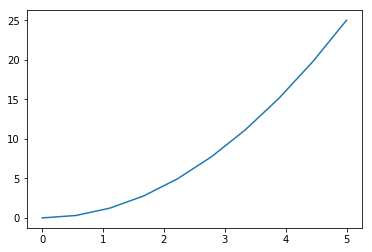

In [2]:
x = np.linspace(0, 5, 10)
plt.plot(x, x**2)

We imported the module `matplotlib.plot` as `plt`, and we call a function of it called `plot` to plot the square function. You always plot discrete points: `x` is a numpy array containing ten points as a linear approximation between zero and five. On closer inspection, the curve is not smooth: this is because ten points are not enough for the illusion of smoothness. Let us add some more points, labels for the axes, and a title for the figure:

In [ ]:
x = np.linspace(0, 5, 100)
y = x**2
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('The most exciting function ever, full stop.')

The order in which you add the decorations to your figure does not matter. The figure is not actually created until you execute the cell. Actually, the execution of the cell just triggers the call of the function `plt.show()`, which instructs Matplotlib to draw the figure *and* display it. In a Python script, you would always call it manually. Let us plot the cube function too, and call `plt.show()` manually:

In [ ]:
x = np.linspace(0, 5, 100)
y1 = x**2
y2 = x**3
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Notice the difference with this case:

In [ ]:
plt.plot(x, y1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y2)
plt.show()

The `plt.show()` resets all settings, so for the second figure, you must set the axes again.

Instead of showing the plot on the screen, you can write them to a file, which will also trigger Matplotlib to draw the figure. If you export it in PDF, it will be as scale-invariant as it can possibly be, and ready for publication.

In [ ]:
x = np.linspace(0, 5, 100)
y1 = x**2
plt.plot(x, y1)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("whatever.pdf")
plt.close()

**2.1.2 Object-oriented paradigm**

The stuff that you see displayed is composed of a hierarchical structure of components. On the top level, it is an instance of the `Figure` class. This is what `plt.plot()` creates for you, with all the other underlying structures within. These include the area where you draw, which is technically called the `Axes` class. You may have more than one `Axes` if you have subplots or embedded plots. `Axes` than have x and y axes, which in turn have a scale, ticks, labels, and so on. If you have a single `Axes` class instantiated, like in the examples below, you can access and change most parts of the hierarchy like you did above with the x and y labels and the figure title. If you want to do anything non-trivial, you have to compose the figure and its components yourself. The examples in this section are mainly from [this tutorial](https://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb). Let us instantiate an object of the figure class, get an area to draw on, and plot the same thing:

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

Armed with this knowledge, we can do inserts:

In [ ]:
fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # insert axes

# main figure
axes1.plot(x, y1, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('Square function in red')

# insert
axes2.plot(x, y2, 'b')
axes2.set_xlabel('x')
axes2.set_ylabel('y')
axes2.set_title('Cube function in blue')
plt.show()

You can also do aribtrary grids of subplots:

In [ ]:
fig, axes = plt.subplots(ncols=2)
y = [y1, y2]
labels = ["Square function", "Cube function"]
colors = ['r', 'b']
for i, ax in enumerate(axes):
    ax.plot(x, y[i], colors[i])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(labels[i])  
fig.tight_layout()

Matplotlib handles LaTeX reasonably well, just put things between $ signs. For instance, we can a fancy legend:

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y1, label=r"$y = x^2$")
ax.plot(x, y2, label=r"$y = x^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.show()

You need the leading `r` in the strings to avoid some nastiness with backslashes.

The rest is all about exploring the parameter space. Here we manually create a grid (this is necessary if we mix 2D, 3D or polar coordinates), and plot a bunch of things that Matplotlib can do.

In [ ]:
# Some new data will be necessary
n = np.random.randn(100000)
t = np.linspace(0, 2 * np.pi, 100)
X, Y = np.meshgrid(t, t)
Z = (2.7 - 2 * np.cos(Y) * np.cos(X) - 0.7 * np.cos(np.pi - 2*Y)).T

# The actual plot
fig = plt.figure(figsize=(12, 6))
axes = [[],[]]
axes[0].append(fig.add_subplot(2, 4, 1))
axes[0][0].scatter(x, x + 0.25*np.random.randn(len(x)))
axes[0][0].set_title("Scatter")
axes[0].append(fig.add_subplot(2, 4, 2))
axes[0][1].step(x, y1, lw=2)
axes[0][1].set_title("Step")
axes[0].append(fig.add_subplot(2, 4, 3))
axes[0][2].bar(x, y1, align="center", width=0.5, alpha=0.5)
axes[0][2].set_title("Bar")
axes[0].append(fig.add_subplot(2, 4, 4))
axes[0][3].fill_between(x, y1, y2, color="green", alpha=0.5);
axes[0][3].set_title("Fill between");
axes[1].append(fig.add_subplot(2, 4, 5))
axes[1][0].hist(n, bins=100)
axes[1][0].set_title("Histogram")
axes[1][0].set_xlim((min(n), max(n)))
axes[1].append(fig.add_subplot(2, 4, 6))
p = axes[1][1].pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
axes[1][1].set_title("Color map")
fig.colorbar(p, ax=axes[1][1])
axes[1].append(fig.add_subplot(2, 4, 7, projection='3d'))
axes[1][2].plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
axes[1][2].set_title("Surface plot")
axes[1].append(fig.add_subplot(2, 4, 8, polar=True))
axes[1][3].plot(t, t, color='blue', lw=3);
axes[1][3].set_title("Polar coordinates")
fig.tight_layout()
plt.show()

**Exercise 1**

2.2 Seaborn
-------------
 - Side effect of importing it.
 - Examples.
 
Witness the magic of it:

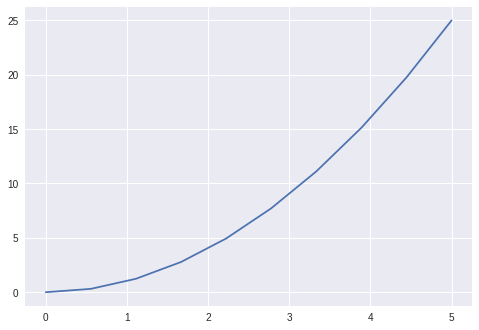

In [3]:
import seaborn
plt.plot(x, x**2)

2.3 Add Pandas
-------------------------
Pandas turns Python into a competitor to R. It allows you to do a wide-scale of statistical operations, but even more importantly, it makes low-level data processing chores easy. For instance, we can load the Iris data set given in CSV format in one single line. This CSV reader is actually much better than you would write with two weeks of effort.

In [ ]:
import pandas as pd
iris = pd.read_csv('Iris.csv', index_col=0)
iris.head()

We will use seaborn for some basic visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)

In [ ]:
sns.pairplot(iris, hue="Species", size=3)

3. Modelling
============

3.1 Machine learning prototypes
------------------------------------
This section is based on the [examples](https://github.com/rasbt/python-machine-learning-book) in the book [Python Machine Learning](https://www.packtpub.com/big-data-and-business-intelligence/python-machine-learning). 

At the end of the day, most machine learning algorithms will output a function that we can use for any data instance. To characterize the learning algorithm, we can plot the decision boundaries that this function produces. The following helper function plots this decision function along the first two dimensions in the data set:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

We reload the Iris data set. In principle, we could convert the Pandas data frame from the previous section, but this data set is actually integrated in Scikit-learn, so we just load that:

In [ ]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

To avoid overfitting, we split the data set in a training and validation part. This is a static random split, not something you would use in 10x random cross-validation.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

We standardize the distribution of the features of the data set. Some kind of normalization or standardization is usually a good idea. Certain learning models work well with data vectors of norm 1, for instance. Here we choose standardization because the physical size parameters of the iris species actually follows a normal distribution.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

The dumbest model we can possibly train is a neural network of a single neuron, trained by stochastic gradient descent. Even this simple model misses only four instances:

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

The decision boundary is linear. 

Notice the `C` parameter in the instantiation of the logistic regression class. This is not a parameter, but a hyperparameter: the training algorithm (the same stochastic gradient descent as in the perceptron) does not optimize over it. It is our task to find a good value for it. The objective function we are optimizing for logistic regression is

$$J(\mathbf{w}) = \sum_{i=1}^N\left[-y_i \log(\phi(z_i))-(1-y_i)\log(1-\phi(z_i))\right] + \frac{1}{2C}||w||^2$$,

where $z = w^\top x$. By increasing the regularization term $\frac{1}{2C}$, we get a sparser model. In our case, it means that fewer features will be factored in. We can plot this as follows:

In [ ]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

This regularization term makes machine learning very different from statistics, at least as far as structural risk minimization goes. In general, sparser model will have better generalization properties, that is, they are less prone to overfitting. Since there is no explicit way to optimize over the hyperparameter, you typically do something like grid search.

3.2 Quantum simulations
---------------------------

First we import a handful of functions from QuTiP:

In [ ]:
from __future__ import print_function, division
import numpy as np
import pylab as plt
from qutip import destroy, basis, steadystate, expect, mcsolve, mesolve, \
    thermal_dm, plot_fock_distribution, matrix_histogram, hinton, tensor
%matplotlib inline

We take an example from the QuTiP documentation (Section 3.6.5). It is a system that reaches a steady state is a harmonic oscillator coupled to a thermal environment. The initial state is the $|10\rangle$ number state, and it is weakly coupled to a thermal environment characterized by an average particle expectation value of $\langle n\rangle = 2$.

In [ ]:
N = 20
a = destroy(N)
H = a.dag() * a
psi0 = basis(N, 10) # initial state
kappa = 0.1 # coupling to oscillator

Next we define the collapse operators:

In [ ]:
n_th_a = 2 # temperature with average of 2 excitations
rate = kappa * (1 + n_th_a)
c_op_list = [np.sqrt(rate) * a] # decay operators
rate = kappa * n_th_a
c_op_list.append(np.sqrt(rate) * a.dag()) # excitation operators

We calculate the steady state and the particle number in the steady state:

In [ ]:
final_state = steadystate(H, c_op_list)
fexpt = expect(a.dag() * a, final_state)

We calculate the time evolution over a hundred points with two methods: by the Monte Carlo method and by solving the master equation:

In [ ]:
tlist = np.linspace(0, 50, 100)
# monte-carlo
mcdata = mcsolve(H, psi0, tlist, c_op_list, [a.dag() * a], ntraj=100)
# master eq.
medata = mesolve(H, psi0, tlist, c_op_list, [a.dag() * a])

In [ ]:
plt.plot(tlist, mcdata.expect[0], tlist, medata.expect[0], lw=2)
plt.axhline(y=fexpt, color='r', lw=1.5)
plt.ylim([0, 10])
plt.xlabel('Time', fontsize=14)
plt.ylabel('Number of excitations', fontsize=14)
plt.legend(('Monte Carlo', 'Master Equation', 'Steady State'))
plt.title('Decay of Fock state $\left|10\\rangle\\right.$' + ' in a thermal environment with $\langle n\\rangle=2$')


**Exercise 3.1** Improve the Monte Carlo simulation to approximate the master equation closer. Typing `mcsolve?` will give you a detailed help on the parametrization of the solver.

QuTiP has built-in functions to work with thermal states. Let us consider a state that is on average occupied by two photons:

In [ ]:
rho_thermal = thermal_dm(N, 2)

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12,3))
axes[0].matshow(rho_thermal.data.toarray().real)
axes[0].set_title("Matrix plot")
axes[1].bar(np.arange(0, N)-.5, rho_thermal.diag())
axes[1].set_xlim([-.5, N])
axes[1].set_title("Diagonal")
plot_fock_distribution(rho_thermal, fig=fig, ax=axes[2])
axes[2].set_title("Fock number distribution")

**Exercise 3.2** Create and study the maximally mixed state of dimension $N$. Here are three possible ways to do it:
1. The Cheap Way: import the function `maximally_mixed_dm` from QuTiP.
2. The Way of the Boson: use the previous function `thermal_dm` and increase the average particle number until you converge to the maximally mixed state.
3. The Church of Nonlocality Way: trace out half of a maximally entangled state. For qubits, you could create a Bell pair with `(tensor(basis(2, 0), basis(2, 0)) + tensor(basis(2, 1), basis(2, 1))).unit()` and then trace out either party. If you generalize this to $N$ dimensions, you get the solution. Bonus points are awarded for simulating the Unruh effect.

4. Writing good code
====================

- PEP8

- Linting

- Profiling

5. Open science
===============
Things you want to achieve:

1. Reproduceability of results
  - At all. Most numerical results are barely reproduceable, but usually they are not. Not even to the original authors.
  
  - With ease. If you have to struggle to compile something for a week just to start a calculation, that is not particularly attractive.
  
2. Discoverability.

3. More citations. Points 1) and 2) should yield this, which is the ultimate goal of being a scientist today.


Stages:

1. Sharing code under open source licence.

2. Providing decent documentation.

 - Notebook versus repository.

3. Place of sharing.